In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv("/Users/yanni/Downloads/movies.csv")

## INSIGHTS

In [ ]:
# 1. View percentage of Missing data per column
# 2. Sort DataFrame
# 3. Set option to see full Dataframe per cell
# 4. Correlation - look into spearmans vs. Kendal vs. pearson(default)
# 5. Correlation matrix through Seaborn - Heatmap
# 6. Transforming Object/string into numerical data for analysis (for loop + cat.codes)!!! very useful
# 7. Regression plot through Seaborn
# 8. Unstacking for viewing correlations in a pairwise table 
# 9. Sorting pairwise comparison by degree of correlations

In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
df.shape

(7668, 15)

In [79]:
#fill NaN's wih 0
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [80]:
#change dtype to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [81]:
#sort
df = df.sort_values(by=['budget'], inplace=False, ascending=False)

In [82]:
#option to see complete DF
pd.set_option('display.max_rows', None)

In [94]:
#duplicates
#df['company'].drop_duplicates().sort_values(ascending=False)

## ANALYSIS

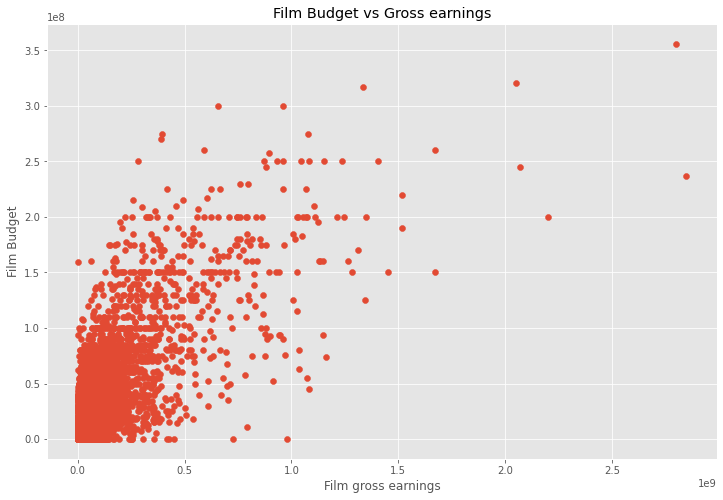

In [60]:
#scatterplot budget vs gross
plt.scatter(x = df['gross'], y = df['budget'])
plt.title('Film Budget vs Gross earnings')
plt.xlabel('Film gross earnings')
plt.ylabel('Film Budget')

plt.show()

In [38]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

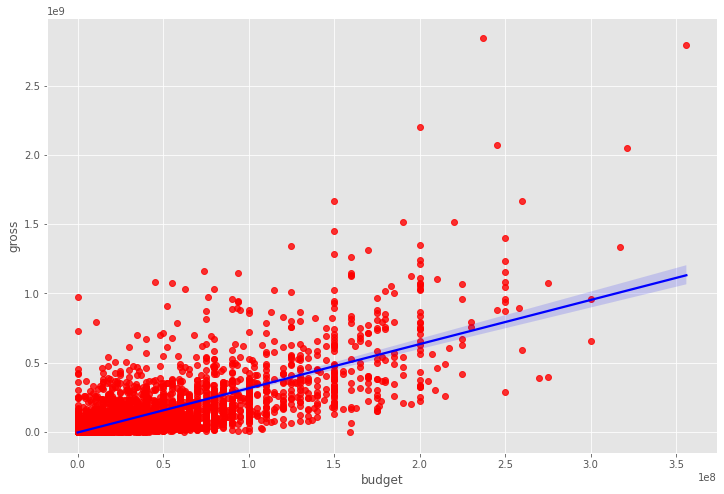

In [64]:
# regression 
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [68]:
#correlation!
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [67]:
#correlation - Kendall 
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


In [69]:
#correlation - spearman
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


Text(87.0, 0.5, 'Film variables')

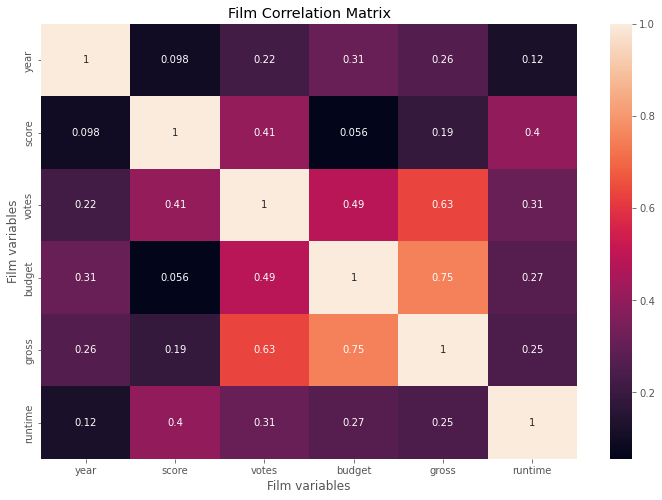

In [75]:
#CORR MATRIX
corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)

plt.title('Film Correlation Matrix')
plt.xlabel('Film variables')
plt.ylabel('Film variables')



In [96]:
#numerize DataFrame
df_numerized = df
for col_name in df_numerized:
    if (df_numerized[col_name].dtypes == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
7075,5145,5,0,2017,661,7.0,581000.0,2282,3518,524,55,317000000,1332698830,2316,152.0
5060,4260,5,0,2007,2405,7.1,608000.0,996,4147,1321,55,300000000,960996492,2316,169.0
7066,2984,5,0,2017,2604,6.1,418000.0,2936,1979,220,55,300000000,657926987,2319,120.0


In [97]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
7075,5145,5,0,2017,661,7.0,581000.0,2282,3518,524,55,317000000,1332698830,2316,152.0
5060,4260,5,0,2007,2405,7.1,608000.0,996,4147,1321,55,300000000,960996492,2316,169.0
7066,2984,5,0,2017,2604,6.1,418000.0,2936,1979,220,55,300000000,657926987,2319,120.0


Text(87.0, 0.5, 'Film variables')

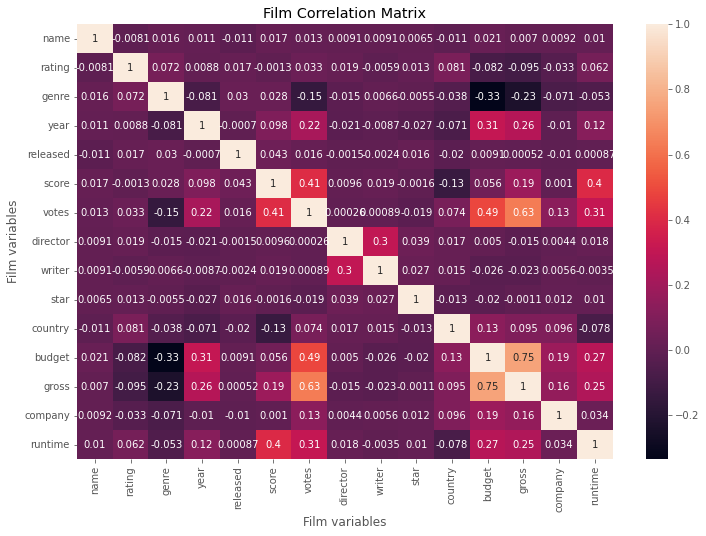

In [84]:
#CORR MATRIX All columns 
corr_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)

plt.title('Film Correlation Matrix')
plt.xlabel('Film variables')
plt.ylabel('Film variables')




In [88]:
Unstack!!!
corr_mat = df_numerized.corr()
corr_pairwise = corr_mat.unstack()
corr_pairwise

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.006989
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [98]:
sorted_pairs = corr_pairwise.sort_values()
sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
        votes    -0.145307
dtype: float64

In [92]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]
high_corr.

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

 ## FINDINGS

In [93]:
# film votes and budget are correlated with film gross earnings!!!